In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import os
if os.getcwd().endswith('tools'):
    os.chdir('..')

Populating the interactive namespace from numpy and matplotlib


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification
from sklearn.cross_validation import train_test_split, ShuffleSplit

from sklearn.linear_model import SGDClassifier
from MLUtilities.semi_supervised.classification import SemiSupervisedSGDClassifier

### Generate toy data

In [3]:
np.random.seed(0)

centers = [[0, 1], [-2, -2], [1, -1]]
n_samples = [1000, 1500, 500]
stds = [.8, 1.2, .5]
n_clusters = len(centers)

X = []
y = []
for c in range(n_clusters):
    xi, yi = make_blobs(n_samples=n_samples[c], centers=[centers[c]], cluster_std=stds[c], shuffle=False)
    X.append(xi)
    y.append(yi+c)
X = np.concatenate(X)
y = np.concatenate(y)

# get some labeled data
# L = np.random.randint(0, y.shape[0]+1, size=200)
cv = ShuffleSplit(n=y.shape[0], n_iter=1, train_size=.1, test_size=None)
for L, U in cv:
    pass

# dataframe representation of features
dff = pd.DataFrame(X)

L = pd.Index(L).sort_values()
U = pd.Index(U).sort_values()

XL = dff.loc[L, :].values
yL = y.take(L.values)

XU = dff.loc[U, :].values
yU = y.take(U.values)

# XL, XU, yL, yU = train_test_split(X, y, train_size=.1)
print 'Labeled size:', XL.shape
print 'Unlabeled size:', XU.shape

Labeled size: (300L, 2L)
Unlabeled size: (2700L, 2L)


In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
yLb = lb.fit_transform(yL)
yLb.ndim

yLb[:5, 0:1] = 2
yLb[91:95, 0:1] = 2
yLb[246:250, 1:2] = 2

Accuracy = 0.937037037037
Accuracy = 0.934444444444


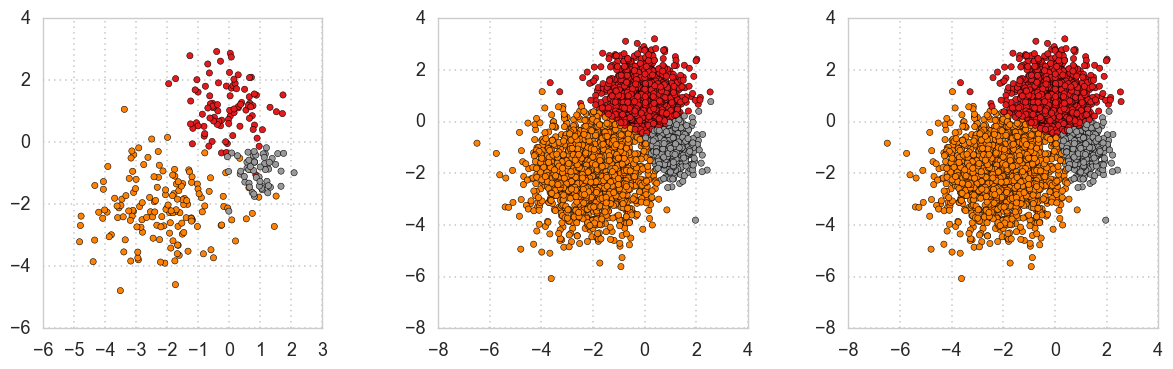

In [11]:
sns.set('talk', 'whitegrid', palette='Set1', rc={'grid.linestyle':':'})
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(1,3,1)
ax.scatter(XL[:,0], XL[:,1], c=yL, cmap='Set1')
ax.set_aspect('equal')

# ------------

clf = SGDClassifier(alpha=0.01)
clf.fit(XL, yL)
ypU = clf.predict(XU)
print 'Accuracy =',clf.score(XU, yU)

ax = fig.add_subplot(1,3,2)
ax.scatter(XU[:,0], XU[:,1], c=ypU, cmap='Set1')
ax.set_aspect('equal')

# -------------

clfss = SemiSupervisedSGDClassifier(alpha=.01, verbose=False, loss='log')
clfss.fit(XL, yLb)
ypsU = clfss.predict(XU)
print 'Accuracy =',clfss.score(XU, yU)

ax = fig.add_subplot(1,3,3)
ax.scatter(XU[:,0], XU[:,1], c=ypsU, cmap='Set1')
ax.set_aspect('equal')
